In [ ]:
import numpy as np
from PIL import Image
import cv2
from google.colab import drive
import matplotlib.pyplot as plt

import math
import time

drive.mount('/content/gdrive')
%cd 'gdrive/My Drive/Colab Notebooks'


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
[Errno 2] No such file or directory: 'My Drive/Colab Notebooks'
/content


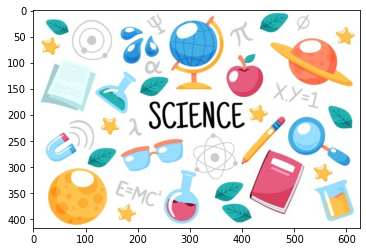

In [ ]:
import matplotlib.pyplot as plt
img = cv2.imread('science.jpg')

img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
plt.imshow(img)

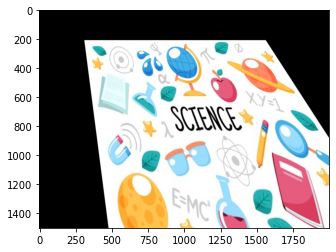

In [ ]:
m = np.array([
              [2,0.,626//2.],
              [0.,2,417//2.],
              [0, -9.08406008e-04,1.]
              ])
# m = np.array([[-2.76356589e-01,  0.00000000e+00,  3.65000000e+02],
#  [-3.46899225e-01,  3.33333333e-01,  2.13333333e+02],
#  [-1.08406008e-02,  0.00000000e+00,  1.00000000e+00]])

img_p = cv2.warpPerspective(img, m, (2000, 1500))
plt.imshow(img_p)

In [ ]:
img.shape[1]

626

In [6]:
import plotly.express as px

x=(0,1,1,0)
y=(0,0,1,1)
z=(0,0,0,0)

x=range(0,10,1)
y=range(0,10,1)
z=range(0,10,1)

#x,y,z = zip(x,y,z)

fig = px.scatter_3d(x=x, y=y, z=z)
fig.show()

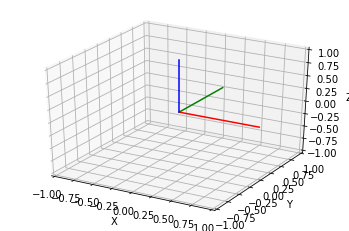

In [ ]:
from pytransform3d.rotations import plot_basis
plot_basis()


In [ ]:
!pip install pytransform3d


     |████████████████████████████████| 61kB 5.0MB/s 
  Created wheel for pytransform3d: filename=pytransform3d-1.7-cp37-none-any.whl size=56660 sha256=91322f1516a01740bbdc9b60a335f345a321e6786020bb9febd878f70abcd9e7
  Stored in directory: /root/.cache/pip/wheels/9b/71/b3/30631830fa08ed5aed37a3afbb14ddddee750d1e2669ae421c
Successfully built pytransform3d



Camera Transform

We can see the camera frame and the world frame. There is a grid of points from
which we know the world coordinates. If we know the location and orientation of
the camera in the world, we can easily compute the location of the points on
the image.



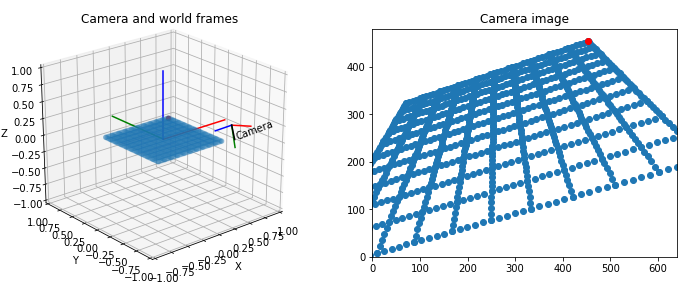

In [ ]:
"""
================
Camera Transform
================

We can see the camera frame and the world frame. There is a grid of points from
which we know the world coordinates. If we know the location and orientation of
the camera in the world, we can easily compute the location of the points on
the image.
"""
print(__doc__)


import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import proj3d
from pytransform3d.rotations import active_matrix_from_intrinsic_euler_xyz
from pytransform3d.transformations import transform_from, plot_transform
from pytransform3d.camera import make_world_grid, world2image


cam2world = transform_from(
    active_matrix_from_intrinsic_euler_xyz([-np.pi + 1, -0.1, 0.3]),
    [0.2, -1, 0.5])
focal_length = 0.0036
sensor_size = (0.00367, 0.00274)
image_size = (640, 480)

world_grid = make_world_grid()
image_grid = world2image(world_grid, cam2world, sensor_size, image_size,
                         focal_length)

plt.figure(figsize=(12, 5))
try:
    ax = plt.subplot(121, projection="3d", aspect="equal")
except NotImplementedError:
    # HACK: workaround for bug in new matplotlib versions (ca. 3.02):
    # "It is not currently possible to manually set the aspect"
    ax = plt.subplot(121, projection="3d")
ax.view_init(elev=30, azim=-70)
ax.set_xlim((-1, 1))
ax.set_ylim((-1, 1))
ax.set_zlim((-1, 1))
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
plot_transform(ax)
plot_transform(ax, A2B=cam2world, s=0.3, name="Camera")
ax.set_title("Camera and world frames")
ax.scatter(world_grid[:, 0], world_grid[:, 1], world_grid[:, 2], alpha=0.2)
ax.scatter(world_grid[-1, 0], world_grid[-1, 1], world_grid[-1, 2], color="r")
ax.view_init(elev=25, azim=-130)

ax = plt.subplot(122, aspect="equal")
ax.set_title("Camera image")
ax.set_xlim(0, image_size[0])
ax.set_ylim(0, image_size[1])
ax.scatter(image_grid[:, 0], -(image_grid[:, 1] - image_size[1]))
ax.scatter(image_grid[-1, 0], -(image_grid[-1, 1] - image_size[1]), color="r")

plt.show()